In [1]:
from datetime import datetime

from sqlalchemy import (MetaData, Table, Column, Integer, Numeric, String,
                        DateTime, ForeignKey, Boolean, create_engine, CheckConstraint)
metadata = MetaData()

cookies = Table('cookies', metadata,
    Column('cookie_id', Integer(), primary_key=True),
    Column('cookie_name', String(50), index=True),
    Column('cookie_recipe_url', String(255)),
    Column('cookie_sku', String(55)),
    Column('quantity', Integer()),
    Column('unit_cost', Numeric(12, 2)),
    CheckConstraint('quantity > 0', name='quantity_positive')
)

users = Table('users', metadata,
    Column('user_id', Integer(), primary_key=True),
    Column('username', String(15), nullable=False, unique=True),
    Column('email_address', String(255), nullable=False),
    Column('phone', String(20), nullable=False),
    Column('password', String(25), nullable=False),
    Column('created_on', DateTime(), default=datetime.now),
    Column('updated_on', DateTime(), default=datetime.now, onupdate=datetime.now)
)

orders = Table('orders', metadata,
    Column('order_id', Integer()),
    Column('user_id', ForeignKey('users.user_id')),
    Column('shipped', Boolean(), default=False)
)

line_items = Table('line_items', metadata,
    Column('line_items_id', Integer(), primary_key=True),
    Column('order_id', ForeignKey('orders.order_id')),
    Column('cookie_id', ForeignKey('cookies.cookie_id')),
    Column('quantity', Integer()),
    Column('extended_cost', Numeric(12, 2))
)

engine = create_engine('sqlite:///:memory:')
metadata.create_all(engine)
connection = engine.connect()

In [7]:
from IPython.display import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from eralchemy import render_er

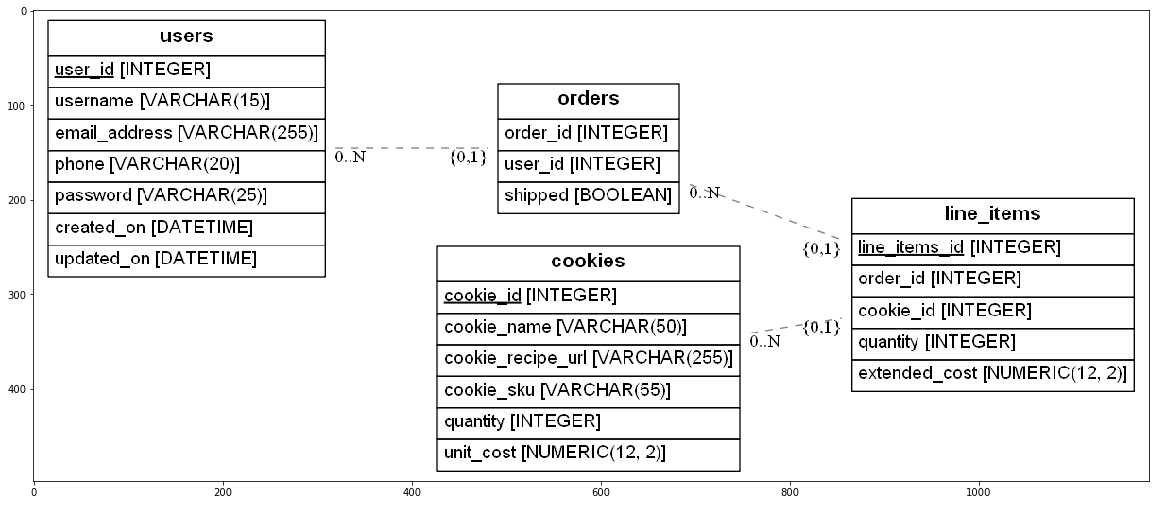

In [50]:
filename = 'mymodel.png'
render_er(metadata, filename)
imgplot = plt.imshow(mpimg.imread(filename))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [47]:
%reload_ext version_information
%version_information sqlalchemy, eralchemy, matplotlib

Software versions
Python 3.4.5 64bit [MSC v.1600 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.15063
sqlalchemy 1.1.5
eralchemy 1.1.0
matplotlib 2.0.0
Sun Sep 03 13:58:43 2017 Taipei Standard Time

In [51]:
from sqlalchemy import select, insert
ins = insert(users).values(
    username="cookiemon",
    email_address="mon@cookie.com",
    phone="111-111-1111",
    password="password"
)
result = connection.execute(ins)

In [52]:
# s = select([users.c.username])
# results = connection.execute(s)
# for result in results:
#     print(result.username)
#     print(result.password)

cookiemon


AttributeError: Could not locate column in row for column 'password'

In [53]:
s = select([users.c.username])
connection.execute(s).fetchall()

[('cookiemon',)]

In [ ]:
# ins = insert(users).values(
#     username="cookiemon",
#     email_address="damon@cookie.com",
#     phone="111-111-1111",
#     password="password"
# )
# result = connection.execute(ins)

In [57]:
from sqlalchemy.exc import IntegrityError
ins = insert(users).values(
    username="cookiemon",
    email_address="damon@cookie.com",
    phone="111-111-1111",
    password="password"
)
try:
    result = connection.execute(ins)
except IntegrityError as error:
#     print(error.orig.message, error.params)    
    print(error.args)
    print(error.params)

('(sqlite3.IntegrityError) UNIQUE constraint failed: users.username',)
('cookiemon', 'damon@cookie.com', '111-111-1111', 'password', '2017-09-03 19:22:49.726552', '2017-09-03 19:22:49.726552')


In [58]:
ins = cookies.insert()
inventory_list = [
    {
        'cookie_name': 'chocolate chip',
        'cookie_recipe_url': 'http://some.aweso.me/cookie/recipe.html',
        'cookie_sku': 'CC01',
        'quantity': '12',
        'unit_cost': '0.50'
    },
    {
        'cookie_name': 'dark chocolate chip',
        'cookie_recipe_url': 'http://some.aweso.me/cookie/recipe_dark.html',
        'cookie_sku': 'CC02',
        'quantity': '1',
        'unit_cost': '0.75'
    },
    {
        'cookie_name': 'peanut butter',
        'cookie_recipe_url': 'http://some.aweso.me/cookie/peanut.html',
        'cookie_sku': 'PB01',
        'quantity': '24',
        'unit_cost': '0.25'
    },
    {
        'cookie_name': 'oatmeal raisin',
        'cookie_recipe_url': 'http://some.okay.me/cookie/raisin.html',
        'cookie_sku': 'EWW01',
        'quantity': '100',
        'unit_cost': '1.00'
    }
]
result = connection.execute(ins, inventory_list)

In [59]:
result.rowcount

4

In [60]:
df = pd.read_sql_table('cookies', connection)
df

,cookie_id,cookie_name,cookie_recipe_url,cookie_sku,quantity,unit_cost
0,1,chocolate chip,http://some.aweso.me/cookie/recipe.html,CC01,12,0.50
1,2,dark chocolate chip,http://some.aweso.me/cookie/recipe_dark.html,CC02,1,0.75
2,3,peanut butter,http://some.aweso.me/cookie/peanut.html,PB01,24,0.25
3,4,oatmeal raisin,http://some.okay.me/cookie/raisin.html,EWW01,100,1.00
